In [1]:
import pandas as pd
import numpy as np
import datetime

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv('taxifare.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)
df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Day']=df['pickup_datetime'].dt.day
df['Hours']=df['pickup_datetime'].dt.hour
df['Minutes']=df['pickup_datetime'].dt.minute
df.drop('pickup_datetime',axis=1,inplace=True)
df['mornight']=np.where(df['Hours']<12,0,1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        120000 non-null  float64
 1   fare_class         120000 non-null  int64  
 2   pickup_longitude   120000 non-null  float64
 3   pickup_latitude    120000 non-null  float64
 4   dropoff_longitude  120000 non-null  float64
 5   dropoff_latitude   120000 non-null  float64
 6   passenger_count    120000 non-null  int64  
 7   Year               120000 non-null  int64  
 8   Month              120000 non-null  int64  
 9   Day                120000 non-null  int64  
 10  Hours              120000 non-null  int64  
 11  Minutes            120000 non-null  int64  
 12  mornight           120000 non-null  int32  
dtypes: float64(5), int32(1), int64(7)
memory usage: 11.4 MB


In [5]:
df['fare_class'].unique()

array([0, 1], dtype=int64)

In [6]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
newdelhi = [28.6139, 77.2090]
bangalore = [12.9716, 77.5946]

In [7]:
newdelhi_in_radians = [radians(_) for _ in newdelhi]
bangalore_in_radians = [radians(_) for _ in bangalore]

In [8]:
result = haversine_distances([newdelhi_in_radians, bangalore_in_radians])
result*6371

array([[   0.       , 1739.8021019],
       [1739.8021019,    0.       ]])

In [11]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [13]:
X=df.iloc[:,[0,2,3,4,5,6,7,8]]
y=df.iloc[:,1]

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

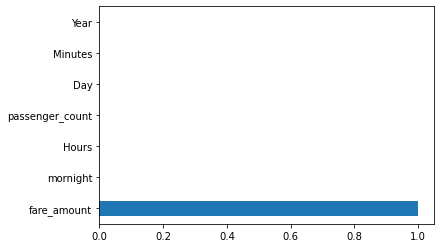

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [17]:
y.value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred=classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[24023     0]
 [    0 11977]]
1.0
